In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 연봉데이터 로딩, 전처리, EDA, Feature Engineering modeling, 성능 검증, 하이퍼파라미터 튜닝

## 기본모델 : DecisionTree
## 배깅, 부스팅, 랜덤배깅, 모델 튜닝

## 분석목적 : 학력, 교육, 연수, 혼인상태, 직업 정보가 있는 연봉데이터셋을 이용해 연봉 예측하기

## 연봉이 5만달러 이상인지 아닌지

In [66]:
data = pd.read_csv("https://raw.githubusercontent.com/haram4th/ADsP/main/salary2.csv")
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   education       48842 non-null  object
 3   education-num   48842 non-null  int64 
 4   marital-status  48842 non-null  object
 5   occupation      46033 non-null  object
 6   relationship    48842 non-null  object
 7   race            48842 non-null  object
 8   sex             48842 non-null  object
 9   capital-gain    48842 non-null  int64 
 10  capital-loss    48842 non-null  int64 
 11  hours-per-week  48842 non-null  int64 
 12  native-country  47985 non-null  object
 13  class           48842 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


* age: 나이
* workclass: 직업군
* education: 교육 수준
* education-num: 교육 연수
* marital-status: 결혼 상태
* occupation: 직업
* relationship: 가족 관계
* race: 인종
* sex: 성별
* capital-gain: 자본 소득
* capital-loss: 자본 손실
* hours-per-week: 주당 근로 시간
* native-country: 출신 국가
* class: 연봉 구분 - target(분석대상)

In [68]:
data.isna().sum()

age                  0
workclass         2799
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
class                0
dtype: int64

In [69]:
data.isna().sum() / len(data)*100

age               0.000000
workclass         5.730724
education         0.000000
education-num     0.000000
marital-status    0.000000
occupation        5.751198
relationship      0.000000
race              0.000000
sex               0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
native-country    1.754637
class             0.000000
dtype: float64

In [70]:
data.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,10.078089,1079.067626,87.502314,40.422382
std,13.710510,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [71]:
data['workclass'].value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [72]:
data['workclass'].unique()

array([' Private', ' Local-gov', nan, ' Self-emp-not-inc', ' Federal-gov',
       ' State-gov', ' Self-emp-inc', ' Without-pay', ' Never-worked'],
      dtype=object)

In [73]:
data['workclass'].nunique()

8

In [74]:
data.groupby('workclass')['capital-gain'].value_counts()

workclass    capital-gain
Federal-gov  0               1281
             7298              26
             7688              26
             15024             16
             5178               7
                             ... 
State-gov    15831              1
             20051              1
Without-pay  0                 19
             2414               1
             4416               1
Name: count, Length: 404, dtype: int64

In [75]:
data.groupby('workclass')['class'].value_counts(sort=False)

workclass         class
Federal-gov       <=50K      871
                  >50K       561
Local-gov         <=50K     2209
                  >50K       927
Never-worked      <=50K       10
Private           <=50K    26519
                  >50K      7387
Self-emp-inc      <=50K      757
                  >50K       938
Self-emp-not-inc  <=50K     2785
                  >50K      1077
State-gov         <=50K     1451
                  >50K       530
Without-pay       <=50K       19
                  >50K         2
Name: count, dtype: int64

In [76]:
data.groupby('workclass')['class'].value_counts(sort=False)

workclass         class
Federal-gov       <=50K      871
                  >50K       561
Local-gov         <=50K     2209
                  >50K       927
Never-worked      <=50K       10
Private           <=50K    26519
                  >50K      7387
Self-emp-inc      <=50K      757
                  >50K       938
Self-emp-not-inc  <=50K     2785
                  >50K      1077
State-gov         <=50K     1451
                  >50K       530
Without-pay       <=50K       19
                  >50K         2
Name: count, dtype: int64

In [77]:
print("Federal-gov 5만달러 이하", 871 / (871+561))
print("Federal-gov 5만달러 초과", 561 / (871+561))

Federal-gov 5만달러 이하 0.6082402234636871
Federal-gov 5만달러 초과 0.39175977653631283


In [78]:
print("Local-gov 5만달러 이상", 2209 / (2209+927))
print("Local-gov 5만달러 이하", 927 / (2209+927))

Local-gov 5만달러 이상 0.7044005102040817
Local-gov 5만달러 이하 0.2955994897959184


In [79]:
# Never-worked는 다 5만달러 이하임

In [80]:
print("Private 5만달러 이하", 26519 / (26519+7387))
print("Private 5만달러 초과", 7387 / (26519+7387))

Private 5만달러 이하 0.7821329558190291
Private 5만달러 초과 0.21786704418097091


In [81]:
print("Self-emp-inc 5만달러 이하", 757 / (757+938))
print("Self-emp-inc 5만달러 초과", 938 / (757+938))

Self-emp-inc 5만달러 이하 0.44660766961651915
Self-emp-inc 5만달러 초과 0.5533923303834808


In [82]:
print("Self-emp-not-inc 5만달러 이하", 2785 / (2785+1077))
print("Self-emp-not-inc 5만달러 초과", 1077 / (2785+1077))

Self-emp-not-inc 5만달러 이하 0.7211289487312273
Self-emp-not-inc 5만달러 초과 0.27887105126877265


In [83]:
print("State-gov 5만달러 이하", 1451 / (1451+530))
print("State-gov 5만달러 초과", 530 / (1451+530))

State-gov 5만달러 이하 0.7324583543664815
State-gov 5만달러 초과 0.2675416456335184


In [84]:
print("Without-pay 5만달러 이하", 19 / (19+2))
print("Without-pay 5만달러 초과", 2 / (19+2))

Without-pay 5만달러 이하 0.9047619047619048
Without-pay 5만달러 초과 0.09523809523809523


In [87]:
data_w_o = data[(data['occupation'].isna() == True) | (data['workclass'].isna() == True)]

In [88]:
data_w_o

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
4,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
6,29,NaN,HS-grad,9,Never-married,NaN,Unmarried,Black,Male,0,0,40,United-States,<=50K
13,58,NaN,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,35,United-States,<=50K
22,72,NaN,7th-8th,4,Divorced,NaN,Not-in-family,White,Female,0,0,6,United-States,<=50K
35,65,NaN,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48811,35,NaN,Bachelors,13,Married-civ-spouse,NaN,Wife,White,Female,0,0,55,United-States,>50K
48812,30,NaN,Bachelors,13,Never-married,NaN,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
48820,71,NaN,Doctorate,16,Married-civ-spouse,NaN,Husband,White,Male,0,0,10,United-States,>50K
48822,41,NaN,HS-grad,9,Separated,NaN,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [90]:
data_w_o['workclass'].unique()

array([nan, ' Never-worked'], dtype=object)

In [ ]:
data_w_o['workclass']

In [22]:
# 5만달러 초과
print("Private", 7387 / (26519+7387))
print("Self-emp-inc", 938 / (757+938))
print("Self-emp-not-inc", 1077 / (2785+1077))
print("State-gov", 530 / (1451+530))
print("Without-pay", 2 / (19+2))

Private 0.21786704418097091
Self-emp-inc 0.5533923303834808
Self-emp-not-inc 0.27887105126877265
State-gov 0.2675416456335184
Without-pay 0.09523809523809523


In [23]:
data['workclass'] = data['workclass'].fillna('Private')

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   education       48842 non-null  object
 3   education-num   48842 non-null  int64 
 4   marital-status  48842 non-null  object
 5   occupation      46033 non-null  object
 6   relationship    48842 non-null  object
 7   race            48842 non-null  object
 8   sex             48842 non-null  object
 9   capital-gain    48842 non-null  int64 
 10  capital-loss    48842 non-null  int64 
 11  hours-per-week  48842 non-null  int64 
 12  native-country  47985 non-null  object
 13  class           48842 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


In [25]:
data.isna().sum()

age                  0
workclass            0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
class                0
dtype: int64

In [30]:
# 직업별
data['occupation'].head

<bound method NDFrame.head of 0         Machine-op-inspct
1           Farming-fishing
2           Protective-serv
3         Machine-op-inspct
4                       NaN
                ...        
48837          Tech-support
48838     Machine-op-inspct
48839          Adm-clerical
48840          Adm-clerical
48841       Exec-managerial
Name: occupation, Length: 48842, dtype: object>

In [27]:
data['occupation'].unique()

array([' Machine-op-inspct', ' Farming-fishing', ' Protective-serv', nan,
       ' Other-service', ' Prof-specialty', ' Craft-repair',
       ' Adm-clerical', ' Exec-managerial', ' Tech-support', ' Sales',
       ' Priv-house-serv', ' Transport-moving', ' Handlers-cleaners',
       ' Armed-Forces'], dtype=object)

In [28]:
data['occupation'].nunique()

14

In [31]:
data['occupation'].value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [32]:
data['occupation'].describe()

count               46033
unique                 14
top        Prof-specialty
freq                 6172
Name: occupation, dtype: object

In [29]:
data.groupby('occupation')['class'].value_counts(sort=False)

occupation         class
Adm-clerical       <=50K    4843
                   >50K      768
Armed-Forces       <=50K      10
                   >50K        5
Craft-repair       <=50K    4729
                   >50K     1383
Exec-managerial    <=50K    3178
                   >50K     2908
Farming-fishing    <=50K    1317
                   >50K      173
Handlers-cleaners  <=50K    1934
                   >50K      138
Machine-op-inspct  <=50K    2650
                   >50K      372
Other-service      <=50K    4719
                   >50K      204
Priv-house-serv    <=50K     239
                   >50K        3
Prof-specialty     <=50K    3388
                   >50K     2784
Protective-serv    <=50K     675
                   >50K      308
Sales              <=50K    4029
                   >50K     1475
Tech-support       <=50K    1026
                   >50K      420
Transport-moving   <=50K    1874
                   >50K      481
Name: count, dtype: int64

In [31]:
print("Adm-clerical 5만달러 이하", 4843 / (4843+768))
print("Adm-clerical 5만달러 초과", 768 / (4843+768))

Adm-clerical 5만달러 이하 0.863126002495099
Adm-clerical 5만달러 초과 0.1368739975049011


In [32]:
print("Armed-Forces 5만달러 이하", 10 / (10+5))
print("Armed-Forces 5만달러 초과", 5 / (10+5))

Armed-Forces 5만달러 이하 0.6666666666666666
Armed-Forces 5만달러 초과 0.3333333333333333


In [33]:
print("Craft-repair 5만달러 이하", 4729 / (4729+1383))
print("Craft-repair 5만달러 초과", 1383 / (4729+1383))

Craft-repair 5만달러 이하 0.7737238219895288
Craft-repair 5만달러 초과 0.2262761780104712


In [34]:
print("Exec-managerial 5만달러 이하", 3178 / (3178+2908))
print("Exec-managerial 5만달러 초과", 2908 / (3178+2908))

Exec-managerial 5만달러 이하 0.5221820571804141
Exec-managerial 5만달러 초과 0.47781794281958595


In [35]:
print("Farming-fishing 5만달러 이하", 1317 / (1317+173))
print("Farming-fishing 5만달러 초과", 173 / (1317+173))

Farming-fishing 5만달러 이하 0.8838926174496644
Farming-fishing 5만달러 초과 0.11610738255033556


In [36]:
print("Handlers-cleaners 5만달러 이하", 1934 / (1934+138))
print("Handlers-cleaners 5만달러 초과", 138 / (1934+138))

Handlers-cleaners 5만달러 이하 0.9333976833976834
Handlers-cleaners 5만달러 초과 0.06660231660231661


In [37]:
print("Machine-op-inspct 5만달러 이하", 2650 / (2650+372))
print("Machine-op-inspct 5만달러 초과", 372 / (2650+372))

Machine-op-inspct 5만달러 이하 0.8769027134348114
Machine-op-inspct 5만달러 초과 0.12309728656518862


In [38]:
print("Other-service 5만달러 이하", 4719 / (4719+204))
print("Other-service 5만달러 초과", 204 / (4719+204))

Other-service 5만달러 이하 0.9585618525289458
Other-service 5만달러 초과 0.04143814747105423


In [39]:
print("Priv-house-serv 5만달러 이하", 239 / (239+3))
print("Priv-house-serv 5만달러 초과", 3 / (239+3))

Priv-house-serv 5만달러 이하 0.987603305785124
Priv-house-serv 5만달러 초과 0.012396694214876033


In [40]:
print("Prof-specialty 5만달러 이하", 3388 / (3388+2784))
print("Prof-specialty 5만달러 초과", 2784 / (3388+2784))

Prof-specialty 5만달러 이하 0.5489306545690213
Prof-specialty 5만달러 초과 0.4510693454309786


In [41]:
print("Protective-serv 5만달러 이하", 675 / (675+308))
print("Protective-serv 5만달러 초과", 308 / (675+308))

Protective-serv 5만달러 이하 0.6866734486266531
Protective-serv 5만달러 초과 0.3133265513733469


In [42]:
print("Sales 5만달러 이하", 4029 / (4029+1475))
print("Sales 5만달러 초과", 1475 / (4029+1475))

Sales 5만달러 이하 0.7320130813953488
Sales 5만달러 초과 0.2679869186046512


In [43]:
print("Tech-support 5만달러 이하", 1026 / (1026+420))
print("Tech-support 5만달러 초과", 420 / (1026+420))

Tech-support 5만달러 이하 0.7095435684647303
Tech-support 5만달러 초과 0.29045643153526973


In [44]:
print("Transport-moving 5만달러 이하", 1874 / (1874+481))
print("Transport-moving 5만달러 초과", 481 / (1874+481))

Transport-moving 5만달러 이하 0.7957537154989385
Transport-moving 5만달러 초과 0.20424628450106158


In [ ]:
#Exec-managerial이 제일 높음

In [46]:
data['occupation'].describe()

count               46033
unique                 14
top        Prof-specialty
freq                 6172
Name: occupation, dtype: object

In [64]:
data[data['occupation'].isna() == True]

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
4,18,Private,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
6,29,Private,HS-grad,9,Never-married,NaN,Unmarried,Black,Male,0,0,40,United-States,<=50K
13,58,Private,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,35,United-States,<=50K
22,72,Private,7th-8th,4,Divorced,NaN,Not-in-family,White,Female,0,0,6,United-States,<=50K
35,65,Private,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48811,35,Private,Bachelors,13,Married-civ-spouse,NaN,Wife,White,Female,0,0,55,United-States,>50K
48812,30,Private,Bachelors,13,Never-married,NaN,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
48820,71,Private,Doctorate,16,Married-civ-spouse,NaN,Husband,White,Male,0,0,10,United-States,>50K
48822,41,Private,HS-grad,9,Separated,NaN,Not-in-family,Black,Female,0,0,32,United-States,<=50K


<Axes: ylabel='Frequency'>

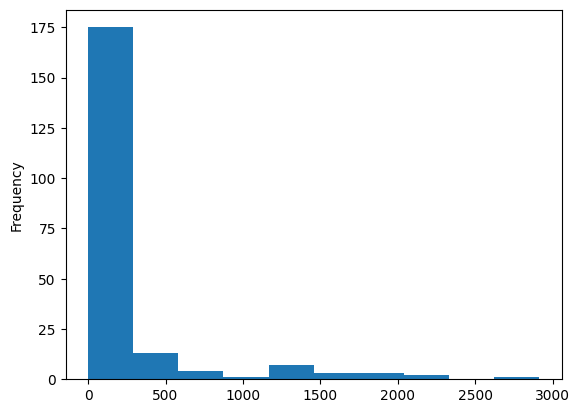

In [54]:
data.groupby('occupation')['education'].value_counts(sort=False).plot(kind = 'hist')

In [55]:
occ = data.groupby('occupation')['education'].value_counts()
occ

occupation        education   
Adm-clerical      HS-grad         2047
                  Some-college    1858
                  Bachelors        765
                  Assoc-acdm       281
                  Assoc-voc        269
                                  ... 
Transport-moving  Masters           14
                  1st-4th           12
                  Prof-school        3
                  Doctorate          2
                  Preschool          2
Name: count, Length: 209, dtype: int64

In [57]:
occ.index

MultiIndex([(    ' Adm-clerical',      ' HS-grad'),
            (    ' Adm-clerical', ' Some-college'),
            (    ' Adm-clerical',    ' Bachelors'),
            (    ' Adm-clerical',   ' Assoc-acdm'),
            (    ' Adm-clerical',    ' Assoc-voc'),
            (    ' Adm-clerical',      ' Masters'),
            (    ' Adm-clerical',         ' 11th'),
            (    ' Adm-clerical',         ' 10th'),
            (    ' Adm-clerical',         ' 12th'),
            (    ' Adm-clerical',      ' 7th-8th'),
            ...
            (' Transport-moving',          ' 9th'),
            (' Transport-moving',         ' 12th'),
            (' Transport-moving',    ' Assoc-voc'),
            (' Transport-moving',      ' 5th-6th'),
            (' Transport-moving',   ' Assoc-acdm'),
            (' Transport-moving',      ' Masters'),
            (' Transport-moving',      ' 1st-4th'),
            (' Transport-moving',  ' Prof-school'),
            (' Transport-moving',    ' Doctorate

In [58]:
data.groupby('education')['class'].value_counts()

education     class
10th          <=50K     1302
              >50K        87
11th          <=50K     1720
              >50K        92
12th          <=50K      609
              >50K        48
1st-4th       <=50K      239
              >50K         8
5th-6th       <=50K      482
              >50K        27
7th-8th       <=50K      893
              >50K        62
9th           <=50K      715
              >50K        41
Assoc-acdm    <=50K     1188
              >50K       413
Assoc-voc     <=50K     1539
              >50K       522
Bachelors     <=50K     4712
              >50K      3313
Doctorate     >50K       431
              <=50K      163
HS-grad       <=50K    13281
              >50K      2503
Masters       >50K      1459
              <=50K     1198
Preschool     <=50K       82
              >50K         1
Prof-school   >50K       617
              <=50K      217
Some-college  <=50K     8815
              >50K      2063
Name: count, dtype: int64

In [33]:
data_mode = data.copy()

In [40]:
data_mode['occupation'] = data_mode['occupation'].fillna(data['occupation'].mode()[0])

In [41]:
data_mode.isna().sum()

age                 0
workclass           0
education           0
education-num       0
marital-status      0
occupation          0
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    857
class               0
dtype: int64

In [42]:
data_mode['occupation'].unique()

array([' Machine-op-inspct', ' Farming-fishing', ' Protective-serv',
       ' Prof-specialty', ' Other-service', ' Craft-repair',
       ' Adm-clerical', ' Exec-managerial', ' Tech-support', ' Sales',
       ' Priv-house-serv', ' Transport-moving', ' Handlers-cleaners',
       ' Armed-Forces'], dtype=object)

In [43]:
data_mode['occupation'].nunique()

14

In [44]:
data_mode['occupation'].value_counts()

occupation
Prof-specialty       8981
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [45]:
data_mode['occupation'].describe()

count               48842
unique                 14
top        Prof-specialty
freq                 8981
Name: occupation, dtype: object

In [46]:
data['occupation'] = data['occupation'].fillna(data['occupation'].mode()[0])

In [47]:
data.isna().sum()

age                 0
workclass           0
education           0
education-num       0
marital-status      0
occupation          0
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    857
class               0
dtype: int64

In [49]:
data['native-country'].value_counts()

native-country
United-States                 43832
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador      

In [52]:
data['native-country'].mode()

0     United-States
Name: native-country, dtype: object

In [51]:
data['native-country'].mode()[0]

' United-States'

In [53]:
data['native-country'] = data['native-country'].fillna(data['native-country'].mode()[0])

In [54]:
data.isna().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64

In [59]:
data['age'].unique()

array([25, 38, 28, 44, 18, 34, 29, 63, 24, 55, 65, 36, 26, 58, 48, 43, 20,
       37, 40, 72, 45, 22, 23, 54, 32, 46, 56, 17, 39, 52, 21, 42, 33, 30,
       47, 41, 19, 69, 50, 31, 59, 49, 51, 27, 57, 61, 64, 79, 73, 53, 77,
       80, 62, 35, 68, 66, 75, 60, 67, 71, 70, 90, 81, 74, 78, 82, 83, 85,
       76, 84, 89, 88, 87, 86], dtype=int64)

In [65]:
data['age'].value_counts()

age
36    1348
35    1337
33    1335
23    1329
31    1325
      ... 
88       6
85       5
87       3
89       2
86       1
Name: count, Length: 74, dtype: int64

In [68]:
data['age'].mode()

0    36
Name: age, dtype: int64

In [70]:
data['age'].describe()

count    48842.000000
mean        38.643585
std         13.710510
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

In [71]:
def age_num(x):
    if ((x >= 17) & (x < 20)):
        x = 10
        return x
    elif ((x >= 20) & (x < 30)):
        x = 20
        return x
    elif ((x >= 30) & (x < 40)):
        x = 30
        return x
    elif ((x >= 40) & (x < 50)):
        x = 40
        return x
    elif ((x >= 50) & (x < 60)):
        x = 50
        return x
    elif ((x >= 60) & (x < 70)):
        x = 60
        return x
    elif ((x >= 70) & (x < 80)):
        x = 70
        return x
    else:
        x = 80
        return x

In [72]:
data['age'] = data['age'].apply(age_num)

In [73]:
data['age'].value_counts()

age
30    12929
20    12005
40    10724
50     6619
60     3054
10     2510
70      815
80      186
Name: count, dtype: int64

In [81]:
data['class']

0            0
1            0
2            0
3         7688
4            0
         ...  
48837        0
48838        0
48839        0
48840        0
48841    15024
Name: capital-gain, Length: 48842, dtype: int64

In [85]:
data.groupby('age')['class'].value_counts()

age  class
10   <=50K     2507
     >50K         3
20   <=50K    11262
     >50K       743
30   <=50K     9468
     >50K      3461
40   <=50K     6738
     >50K      3986
50   <=50K     4110
     >50K      2509
60   <=50K     2245
     >50K       809
70   <=50K      668
     >50K       147
80   <=50K      157
     >50K        29
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

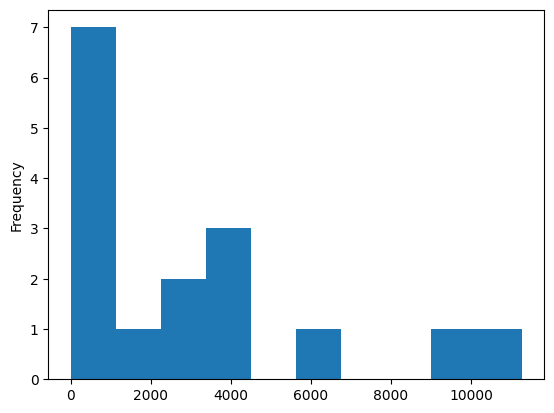

In [86]:
data[['age', 'class']].groupby('age').value_counts(sort = False).plot(kind = 'hist')